# Baseline Model for Twitter Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


This model will use SVM with tf/idf to classify the tweets.

It will reduce the dimensionality of the feature set by adjusting the minimum document frequency of words, in an attempt to get better results.

# Imports and Constants

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
#from sklearn.metrics import evaluation_functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
import ast

In [3]:
DATA_FILE_PATH = '/content/drive/MyDrive/NLPGh/'
CLEAN_DATA_FILE_NAME = 'DataSet2Clean.csv'
TOKENIZED_DATA_FILE_NAME = 'DataSet2Tokenized.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

# Load Data

In [4]:
df = pd.read_csv(DATA_FILE_PATH + TOKENIZED_DATA_FILE_NAME)

In [5]:
df.head()

,Unnamed,tweet,location,pretweet,Sentiment,tokens
0,65780,Pls add us some momo to make data 0246964913 ðŸ˜‚ðŸ˜‚ðŸ˜‚ https://t.co/w5ozYUF59x,NaN,pl add some momo make data,0.0,"['pl', 'add', 'some', 'momo', 'make', 'data']"
1,65781,@McVan_1 @AnnanPerry @blac4rina We will descend on @NAkufoAddo soon,Ghana,will descend soon,0.0,"['will', 'descend', 'soon']"
2,65782,*Forgery allegations by EC is not enough to disqualify the five presidential candidates*\n\nhttps://t.co/GAkYghEbQHâ€¦ https://t.co/o0pCodbuWj,NaN,forgeri alleg not enough disqualifi the five presidenti candid,0.0,"['forgeri', 'alleg', 'not', 'enough', 'disqualifi', 'the', 'five', 'presidenti', 'candid']"
3,65783,@NiiWills @bosompemny I donâ€™t know how dem dey see @NAkufoAddo oo,dansoman accra,dont know how dem dey see,0.0,"['dont', 'know', 'how', 'dem', 'dey', 'see']"
4,65784,Do we have online renewal what what ka kwano?? https://t.co/3CdekJYMgr,Botswana,have onlin renew what what kwano,0.0,"['have', 'onlin', 'renew', 'what', 'what', 'kwano']"


In [6]:
# convert list of strings represented as a string to a list of strings
df.tokens = df.tokens.map(ast.literal_eval)

In [7]:
data = df[['tokens', 'Sentiment']]

In [8]:
data.head()

,tokens,Sentiment
0,"[pl, add, some, momo, make, data]",0.0
1,"[will, descend, soon]",0.0
2,"[forgeri, alleg, not, enough, disqualifi, the, five, presidenti, candid]",0.0
3,"[dont, know, how, dem, dey, see]",0.0
4,"[have, onlin, renew, what, what, kwano]",0.0


# Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['Sentiment'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['Sentiment'])

In [10]:
X_train.shape

(1637,)

In [11]:
X_test.shape

(410,)

# Encode Labels

In [12]:
le = LabelEncoder()

In [13]:
y_train_enc = le.fit_transform(y_train)

In [14]:
y_test_enc = le.transform(y_test)

# Evaluate Adjustments to Minimum Document Frequency

In [15]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [16]:
def train_and_eval_model(min_df):
    """
    Train and Evaluate and Bag of Words Representation with a SVM
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([
    ('bow',CountVectorizer(min_df=min_df,
                           preprocessor=passthrough, 
                           tokenizer=passthrough)),
    ('tfidf', TfidfTransformer()),
    ('SVM', SVC(kernel = 'linear', probability = True, random_state = RANDOM_STATE))])

    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')


    y_pred = pipeline.predict(X_test)



    conf_matrix = confusion_matrix(y_true=y_test_enc, y_pred=y_pred)
    #confusion_matrix(y_true=y_train_enc, y_pred=pipeline.predict(X_train),labels='Training')

    
    classi_report = classification_report(y_true=y_test_enc, y_pred=y_pred, target_names=['Negative', 'Neutral', 'Postive'])
    print(classi_report)

    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
    
    ave_macro_recall = recall_score(y_test_enc, pipeline.predict(X_test), average='macro')
    recall_scores = recall_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, train_accuracy, test_accuracy, ave_macro_recall]),
                             recall_scores)
   
    return test_results,conf_matrix
    

In [17]:
metrics_summary = []

for min_df in range(1,11):
    test_scores,conf_matrix = train_and_eval_model(min_df)
    metrics_summary.append(test_scores)

MINIMUM DOCUMENT FREQUENCY = 1

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.87      0.60      0.71        43

    accuracy                           0.92       410
   macro avg       0.60      0.53      0.56       410
weighted avg       0.90      0.92      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 2

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.90      0.63      0.74        43

    accuracy                           0.93       410
   macro avg       0.61      0.54      0.57       410
weighted avg       0.90      0.93      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 3

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.90      0.63      0.74        43

    accuracy                           0.93       410
   macro avg       0.61      0.54      0.57       410
weighted avg       0.90      0.93      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 4

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.90      0.63      0.74        43

    accuracy                           0.93       410
   macro avg       0.61      0.54      0.57       410
weighted avg       0.90      0.93      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 5

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.89      0.58      0.70        43

    accuracy                           0.92       410
   macro avg       0.61      0.53      0.55       410
weighted avg       0.90      0.92      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 6

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      1.00      0.96       356
     Postive       0.93      0.58      0.71        43

    accuracy                           0.93       410
   macro avg       0.62      0.53      0.56       410
weighted avg       0.90      0.93      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 7

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.89      0.58      0.70        43

    accuracy                           0.92       410
   macro avg       0.61      0.53      0.55       410
weighted avg       0.90      0.92      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 8

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.89      0.58      0.70        43

    accuracy                           0.92       410
   macro avg       0.61      0.53      0.55       410
weighted avg       0.90      0.92      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 9

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.87      0.63      0.73        43

    accuracy                           0.93       410
   macro avg       0.60      0.54      0.56       410
weighted avg       0.90      0.93      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MINIMUM DOCUMENT FREQUENCY = 10

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.90      0.63      0.74        43

    accuracy                           0.93       410
   macro avg       0.61      0.54      0.57       410
weighted avg       0.90      0.93      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                           'macro recall',
                                          'neg recall',
                                          'neutral recall',
                                          'pos recall'])

metrics_summary_df

,min doc freq,train accuracy,test accuracy,macro recall,neg recall,neutral recall,pos recall
0,1.0,0.934026,0.924390,0.532075,0.0,0.991573,0.604651
1,2.0,0.930971,0.929268,0.540763,0.0,0.994382,0.627907
2,3.0,0.928528,0.929268,0.540763,0.0,0.994382,0.627907
3,4.0,0.926695,0.929268,0.540763,0.0,0.994382,0.627907
4,5.0,0.925473,0.924390,0.525259,0.0,0.994382,0.581395
5,6.0,0.924863,0.926829,0.526195,0.0,0.997191,0.581395
6,7.0,0.926084,0.924390,0.525259,0.0,0.994382,0.581395
7,8.0,0.924863,0.924390,0.525259,0.0,0.994382,0.581395
8,9.0,0.926084,0.926829,0.539827,0.0,0.991573,0.627907
9,10.0,0.923030,0.929268,0.540763,0.0,0.994382,0.627907


MINIMUM DOCUMENT FREQUENCY = 5

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.93      0.99      0.96       356
     Postive       0.89      0.58      0.70        43

    accuracy                           0.92       410
   macro avg       0.61      0.53      0.55       410
weighted avg       0.90      0.92      0.91       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


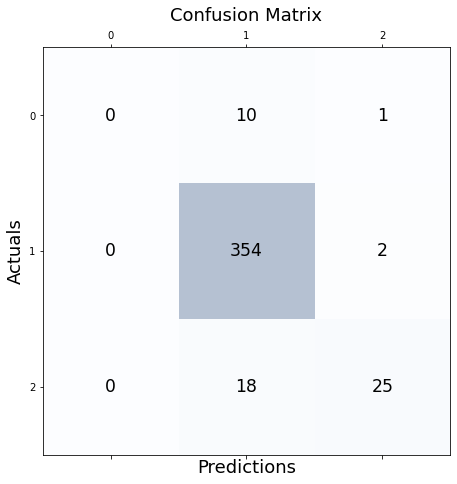

In [19]:
_,conf_matrix = train_and_eval_model(min_df=5)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Summary

This model is only good, and it is very good, at correctly classifying actual members of the majority class as from that class(in this case the Neutral Class).  It has quite a low recall values for the two minority classes, negative and positive.

Looking at the confusion matrix, it is classifying almost all the instances as the majority class, neutral.